# **Heart Disease Presence**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* age
* sex
* chestpain
* testing blood pressure
* cholestoral in mg/dl
* fasting blood sugar
* restşng EKG result
* max heart rate
* exercise induced angina
* oldpeak
* slope of peak exercise ST segment (some medical stuff)
* num of major vessel(0-3)
* thal: 3 = normal, 6 = fixed defect, 7= reversible defect (more medical stuff)
* target = 0 no disease, = 1 RIP

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe() # pls look at statistical stuff to understand data better.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA (Explaratory Data Analysis)

<Axes: xlabel='target', ylabel='count'>

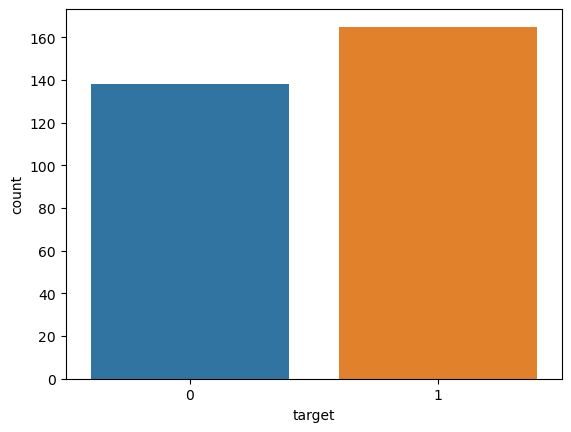

In [6]:
sns.countplot(x="target", data=df)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

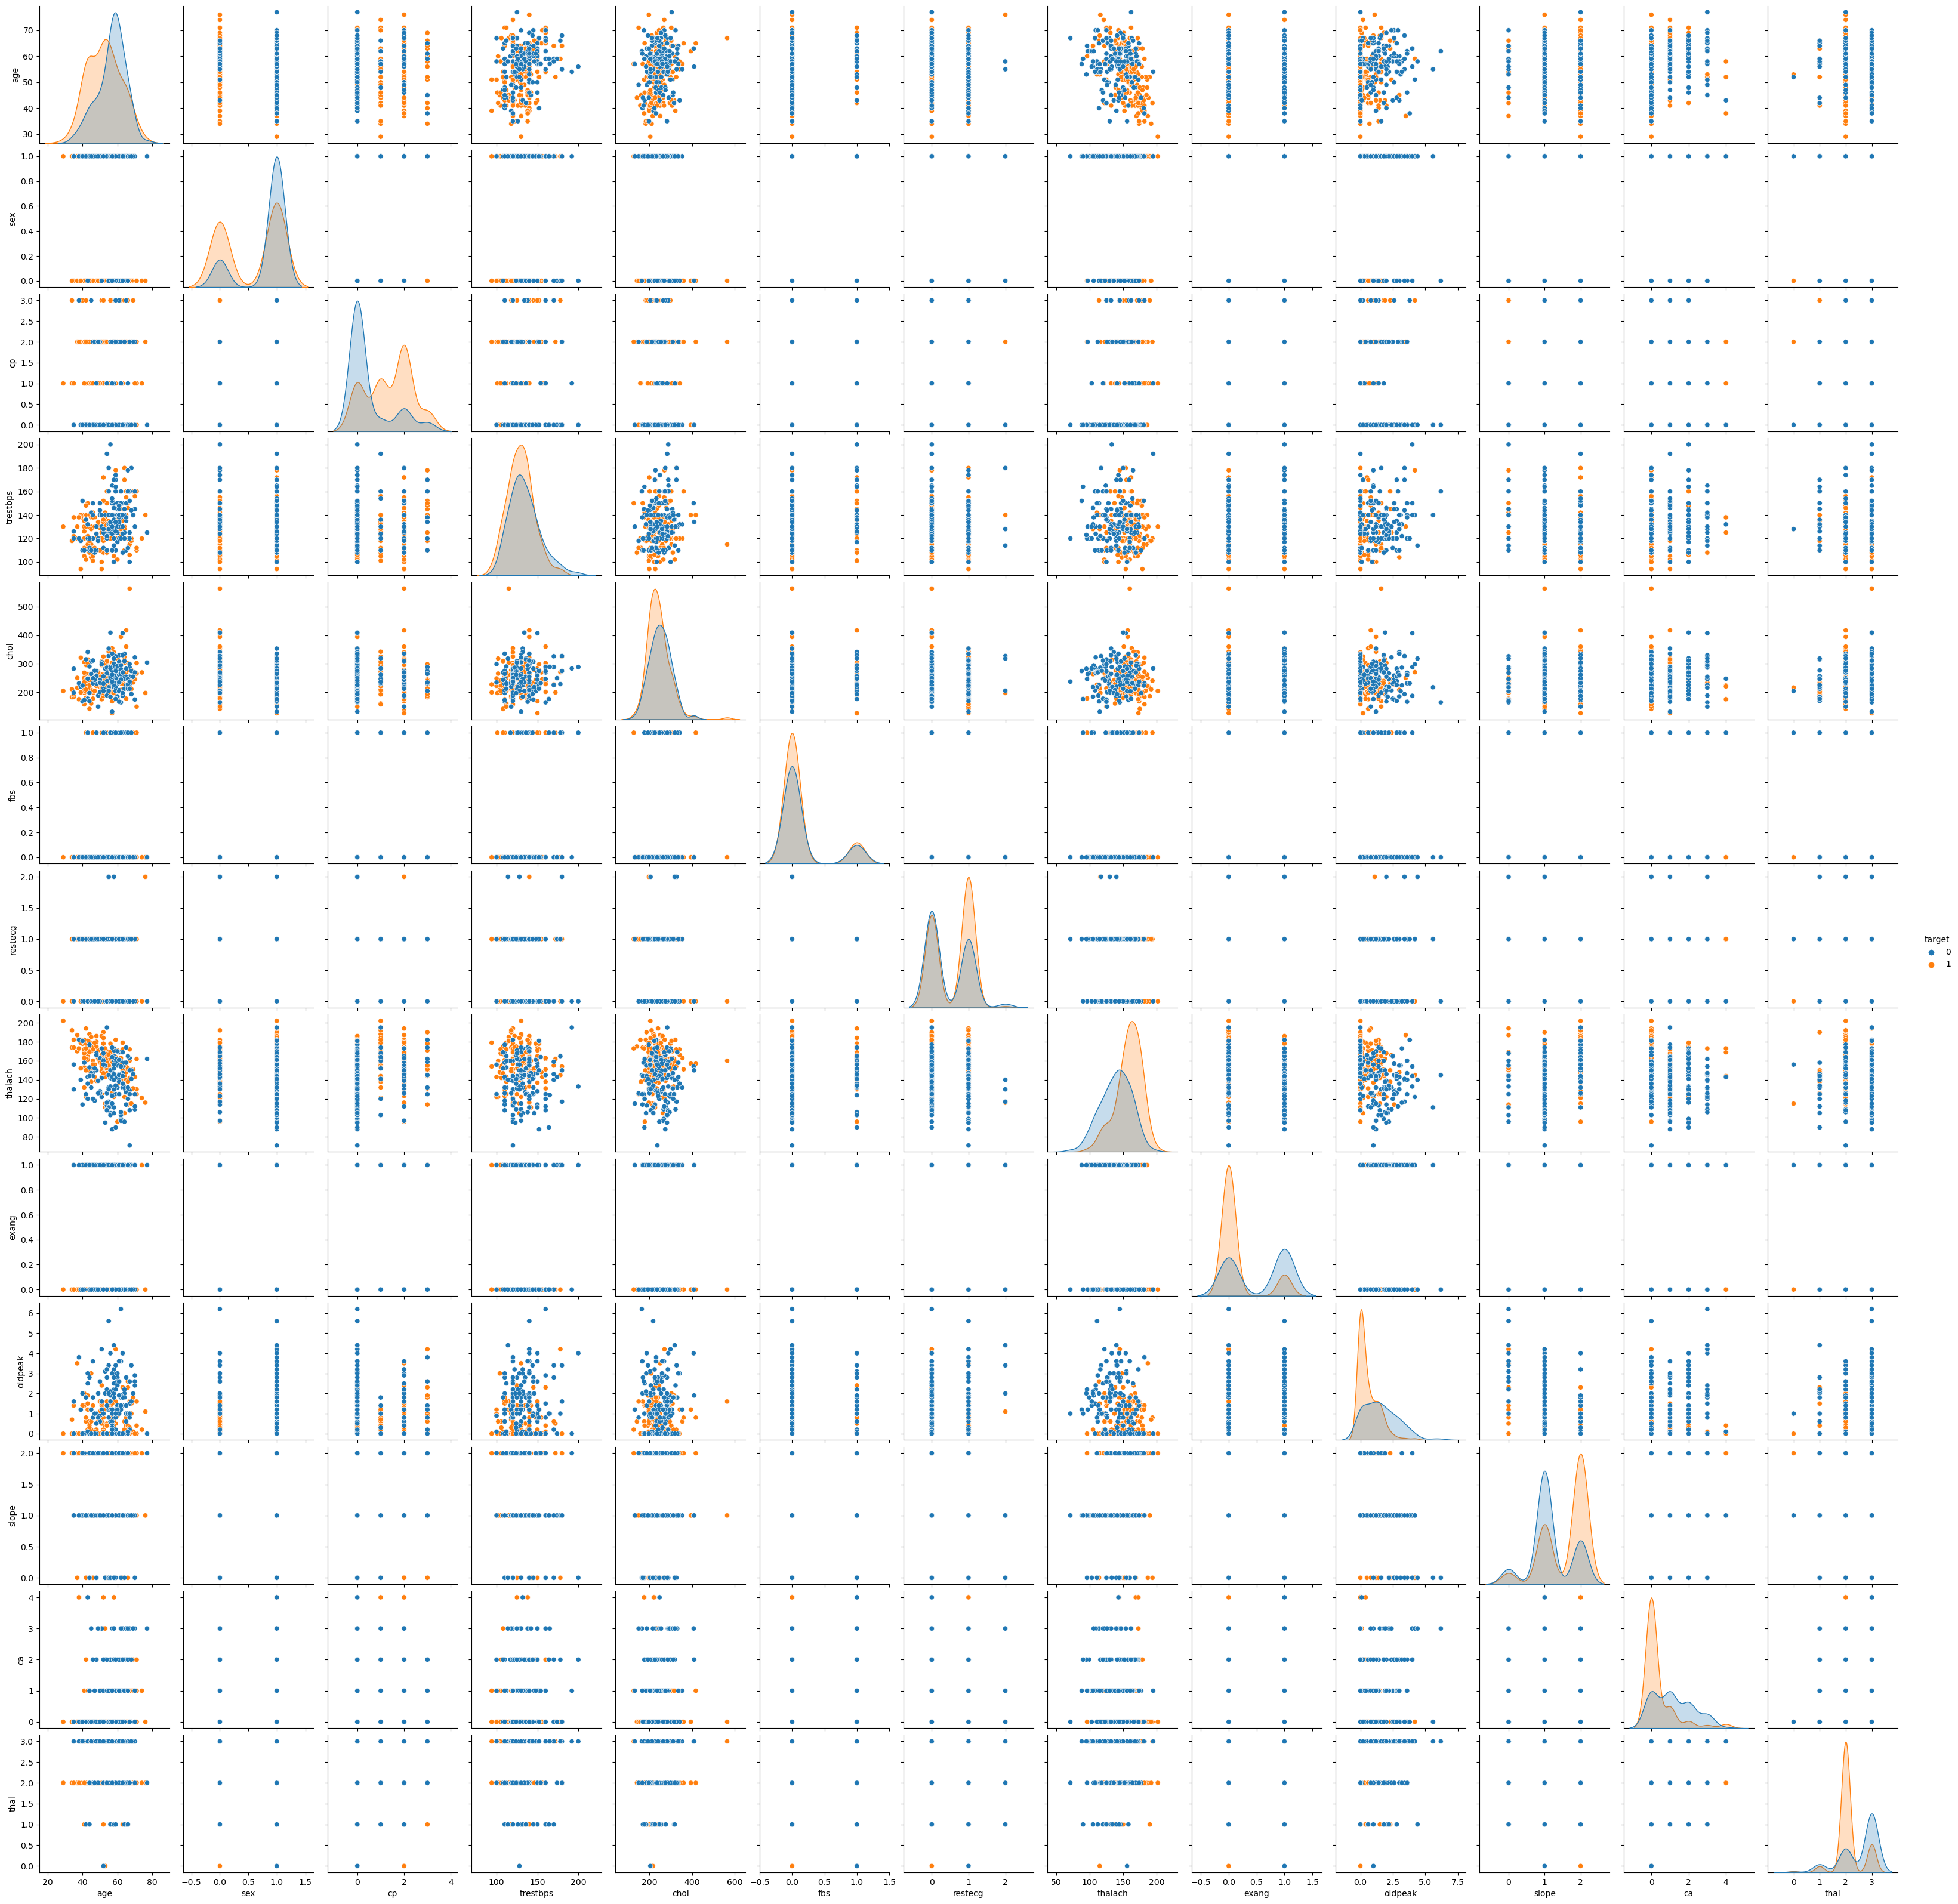

In [8]:
sns.pairplot(df, hue="target")

In [9]:
# it might be take some time due to data.
# more data means more points to plot :D

In [10]:
# ı didnt like that pair plot so ı will pick the significant columns to plot better pair plot

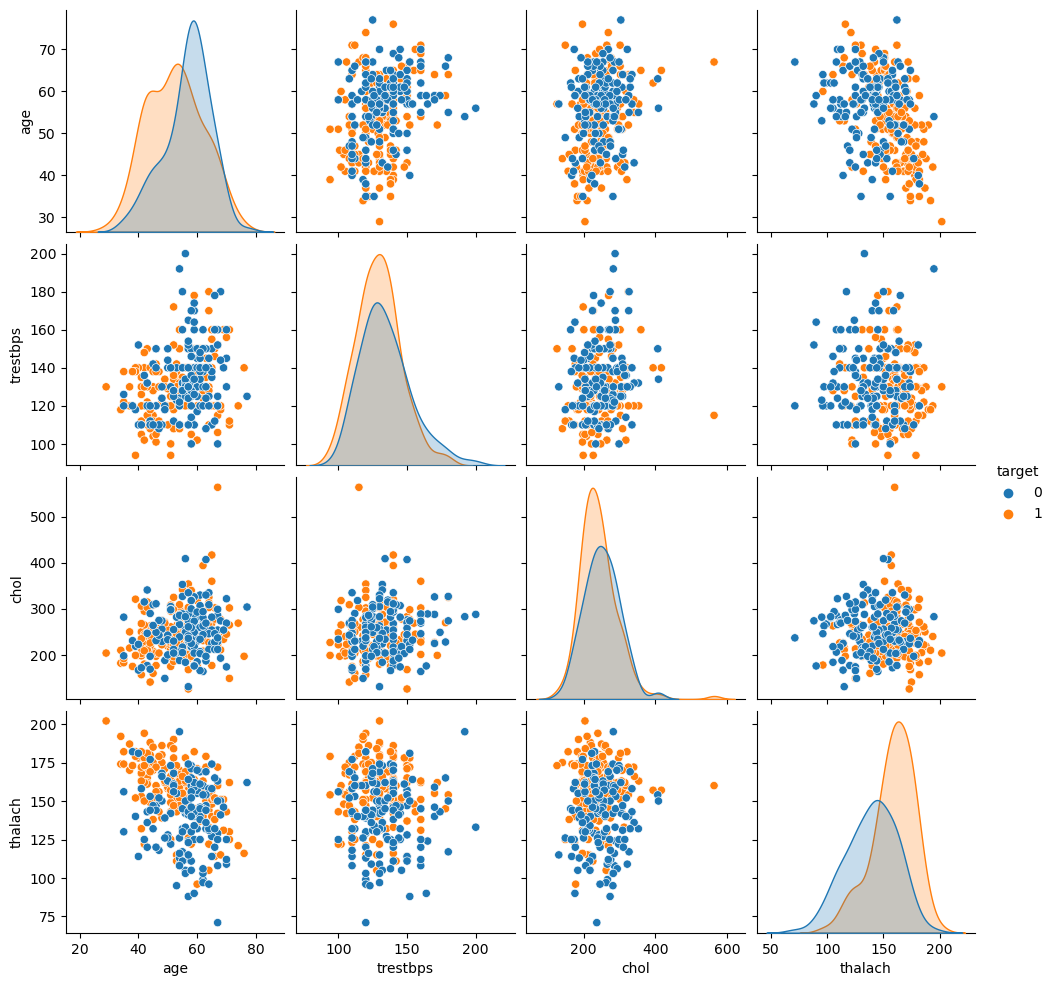

In [11]:
sns.pairplot(df[["age","trestbps","chol","thalach","target"]], hue="target")

<Axes: >

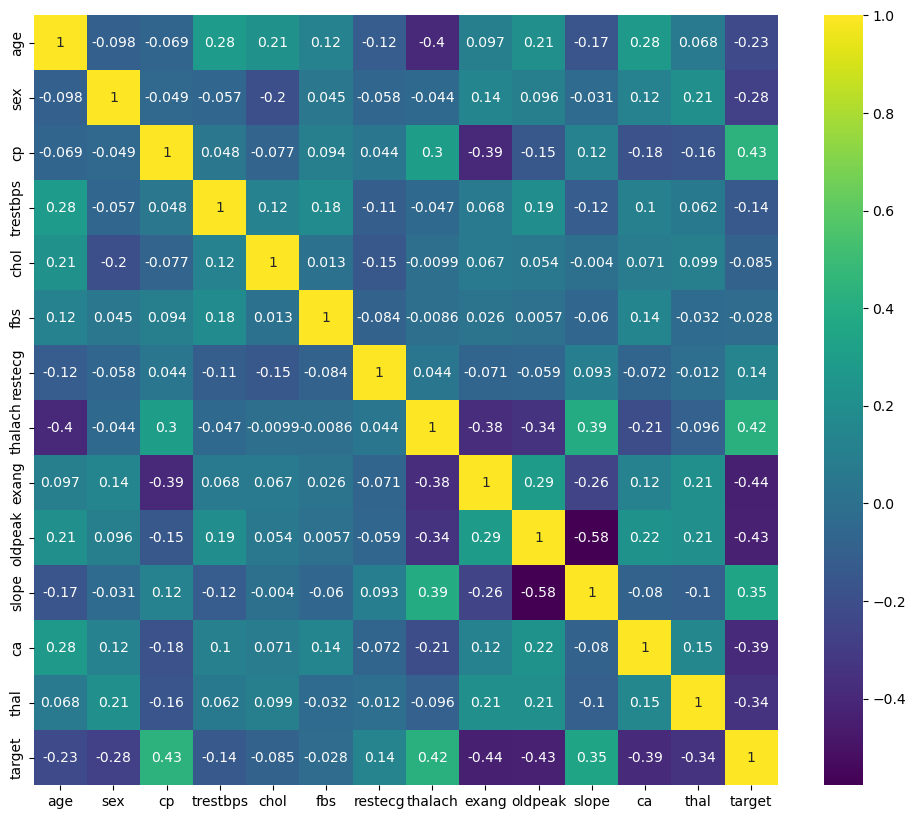

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="viridis", annot=True)

## Machine Learning Model

In [13]:
X = df.drop("target", axis=1)
y = df["target"]

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=9,
                                                    test_size=0.2)

In [16]:
len(df)

303

In [17]:
len(df)*0.2 # 61 data point for our test set.

60.6

In [18]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [19]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegressionCV


In [21]:
model = LogisticRegressionCV()
model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [22]:
model.C_

array([0.04641589])

In [23]:
model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [24]:
model.coef_

array([[-0.15616347, -0.45117561,  0.41340866, -0.18530974, -0.07297574,
         0.03328868,  0.15812508,  0.32296278, -0.35709515, -0.39981892,
         0.26048198, -0.42003599, -0.35962251]])

In [25]:
coef = pd.Series(index=X.columns, data=model.coef_[0])
coef = coef.sort_values()

<Axes: >

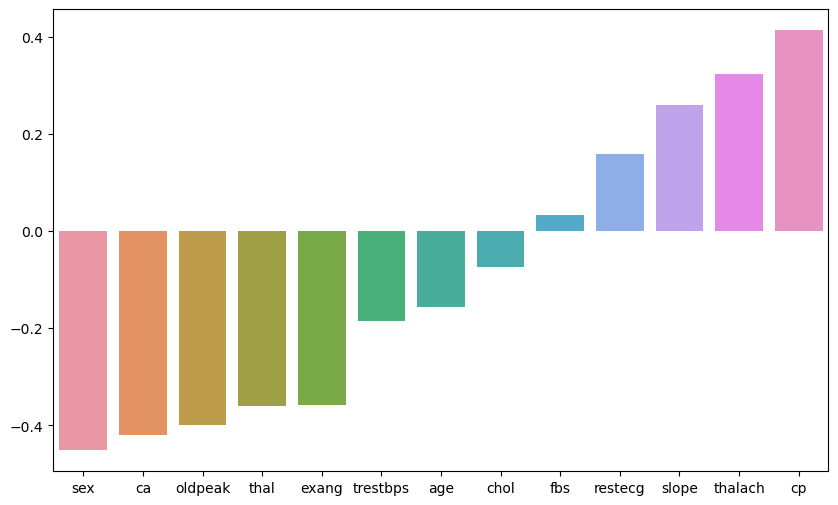

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=coef.index, y=coef.values)

## Performance Metrics

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [28]:
y_pred = model.predict(scaled_X_test)

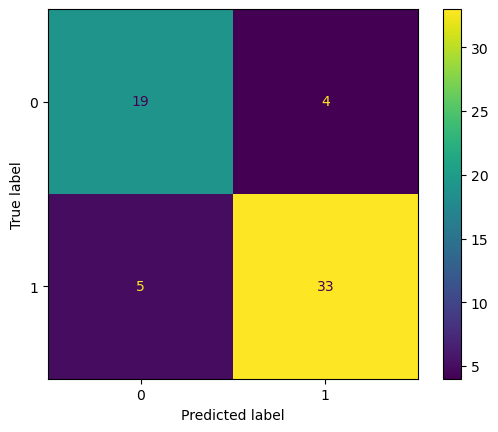

In [29]:
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.89      0.87      0.88        38

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.85      0.85        61



In [31]:
# our model is good. better at seeing the disease. look at f1 score


## Performance Curves

In [32]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

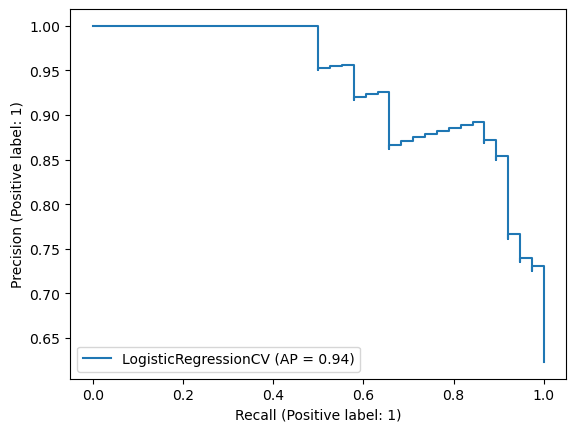

In [33]:
PrecisionRecallDisplay.from_estimator(model, scaled_X_test, y_test)

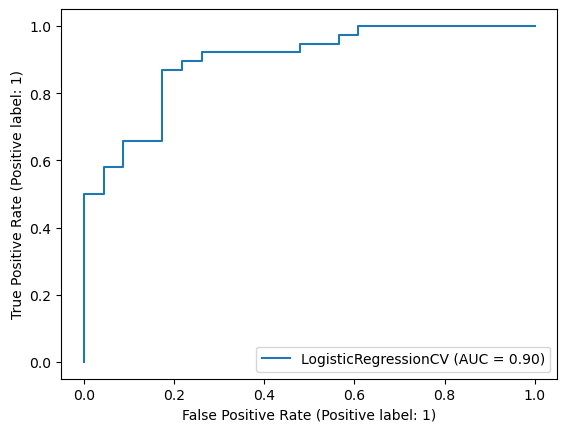

In [34]:
RocCurveDisplay.from_estimator(model, scaled_X_test, y_test)

## Lets try our model's classification capabilities

In [35]:
patient = X_test.iloc[54].values

In [36]:
patient

array([ 57. ,   1. ,   0. , 150. , 276. ,   0. ,   0. , 112. ,   1. ,
         0.6,   1. ,   1. ,   1. ])

In [37]:
model.predict([patient])

array([0], dtype=int64)

In [38]:
#our patient is not sick
# You can try this model on your parents or on your own
## See you and pls subscribe.
# (Dont forget to put this code on your portfolio)

In [60]:
X_test.iloc[35], y_test.iloc[35]

(age          48.0
 sex           1.0
 cp            2.0
 trestbps    124.0
 chol        255.0
 fbs           1.0
 restecg       1.0
 thalach     175.0
 exang         0.0
 oldpeak       0.0
 slope         2.0
 ca            2.0
 thal          2.0
 Name: 90, dtype: float64,
 1)

In [68]:
patient = X_test.iloc[35]

# **Diagnosing Hearth Disease**

In [69]:
patient

age          48.0
sex           1.0
cp            2.0
trestbps    124.0
chol        255.0
fbs           1.0
restecg       1.0
thalach     175.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            2.0
thal          2.0
Name: 90, dtype: float64

In [76]:
model.predict([patient.values])

array([1], dtype=int64)

In [80]:
print("Probability of heart disease : ", round(model.predict_proba(a)[0,1],3)*100 ,"%")

Probability of heart disease :  99.9 %
